In [0]:
#import library
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#load data
fashion_mnist = keras.datasets.fashion_mnist

#set data train and data test
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


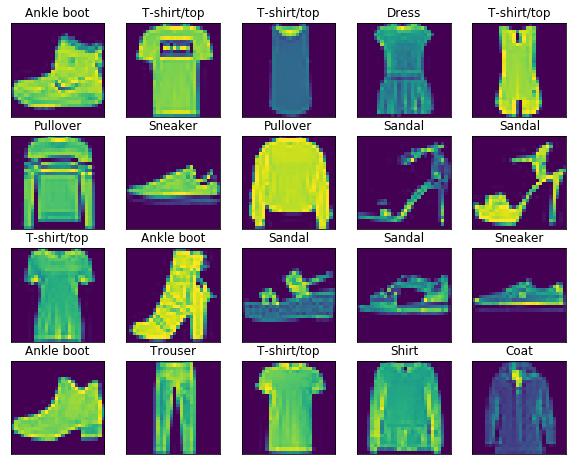

In [0]:
#create name for each labels
image_name=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# show sampel from data train
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(train_images[i])
    plt.title(image_name[(train_labels[i])])
    plt.xticks([])
    plt.yticks([])
  
 

In [0]:
# get data train and data set dimension
train_dim = train_images.shape
test_dim = test_images.shape

# show data train and data test dimension
print("train images dimension",train_images.shape)
print("test images dimension",test_images.shape)


train images dimension (60000, 28, 28)
test images dimension (10000, 28, 28)


In [0]:
# reshape data train and data test from 3D array into 2D array
train = train_images.reshape(train_dim[0], train_dim[1] * train_dim[2])
test = test_images.reshape(test_dim[0], test_dim[1] * test_dim[2])

# train using KNN
model = KNeighborsClassifier(n_neighbors=265)
model.fit(train, train_labels)

# test model learning
print("[INFO] evaluating...")
predictions = model.predict(test)

[INFO] evaluating...


In [0]:
# show classification report
print(classification_report(test_labels, predictions, target_names=image_name))

              precision    recall  f1-score   support

 T-shirt/top       0.72      0.84      0.78      1000
     Trouser       0.99      0.93      0.96      1000
    Pullover       0.68      0.68      0.68      1000
       Dress       0.85      0.82      0.83      1000
        Coat       0.70      0.72      0.71      1000
      Sandal       0.99      0.69      0.81      1000
       Shirt       0.51      0.49      0.50      1000
     Sneaker       0.79      0.91      0.85      1000
         Bag       0.95      0.89      0.92      1000
  Ankle boot       0.83      0.95      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



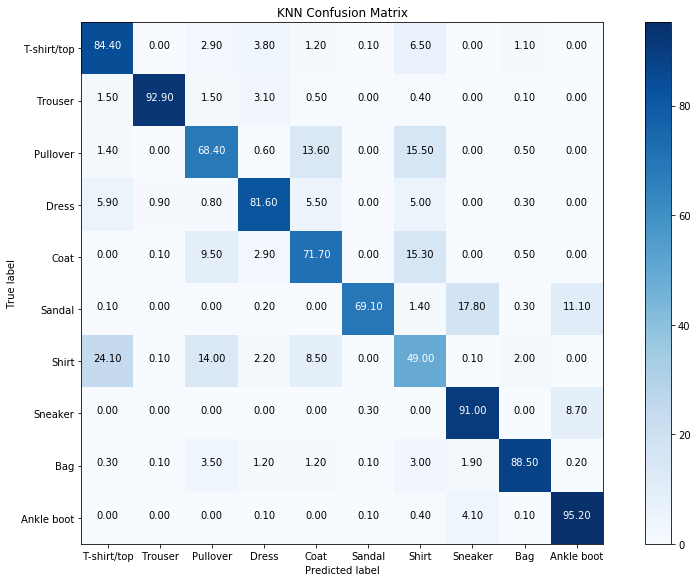

In [0]:
# import library
from sklearn.metrics import confusion_matrix
import itertools

# create confussion matrix
labels = np.unique(test_labels)
knn_confusion_matrix = confusion_matrix(test_labels, predictions, labels)
title = 'KNN Confusion Matrix'
cmap = plt.cm.Blues

# setting figure size and change value to percentage
plt.figure(figsize=(12, 8))
knn_confusion_matrix = (
     knn_confusion_matrix.astype('float') / knn_confusion_matrix.sum(axis=1)[:, np.newaxis]
     ) * 100

# show image with title and labels
plt.imshow(knn_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, image_name)
plt.yticks(tick_marks, image_name)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


# set two digits after point 
fmt = '.2f'
thresh = knn_confusion_matrix.max() / 2.
for i, j in itertools.product(range(knn_confusion_matrix.shape[0]), range(knn_confusion_matrix.shape[1])):
    plt.text(j, i, format(knn_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if knn_confusion_matrix[i, j] > thresh else "black")

plt.show()

In [0]:
#def function to plot the probbility of data in each class
#function to show the image
def plot_image(proba, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)

  predicted_label = np.argmax(proba)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(image_name[predicted_label],
                                np.max(proba)*100,
                                image_name[true_label]),
                                color=color)

#function to show thw probability in each image in class
def plot_value_array(proba, true_label):
  plt.grid(False)
  plt.xticks(range(10),image_name)
  plt.yticks(np.arange(0.0, 1.0, 0.25))
  thisplot = plt.bar(range(10), proba[0], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(proba)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

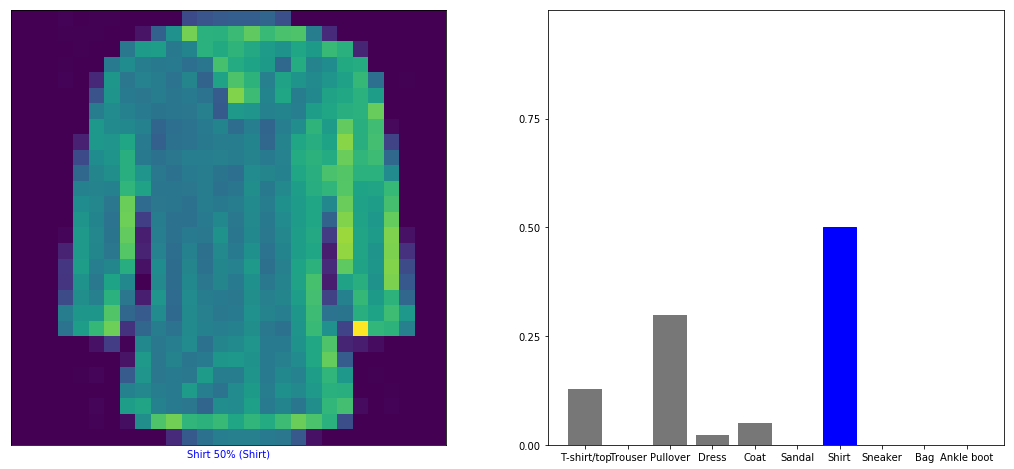

In [0]:
#show the i-th data in testing data
i = 4
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

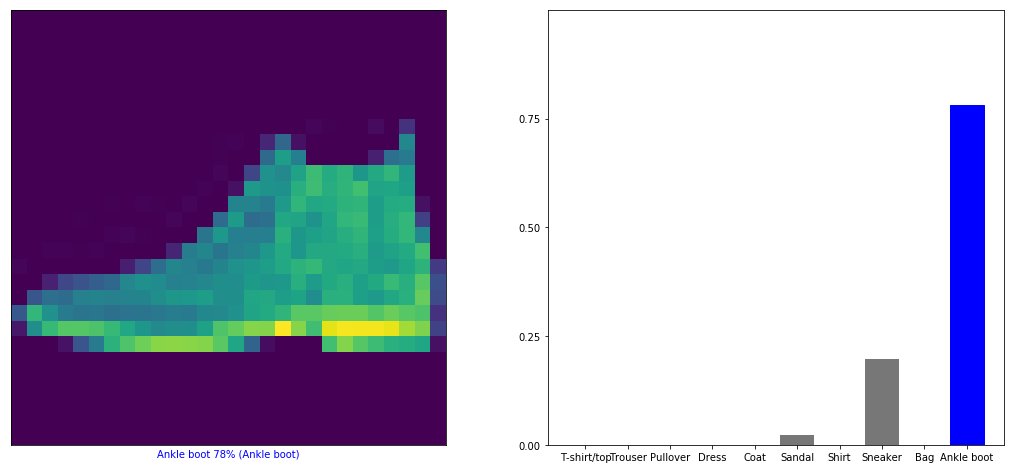

In [0]:
i = 0
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

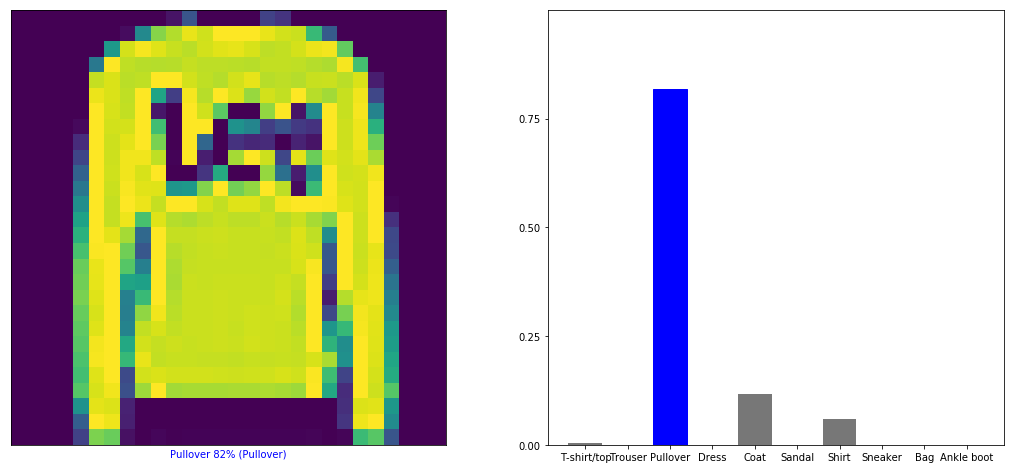

In [0]:
i = 1
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

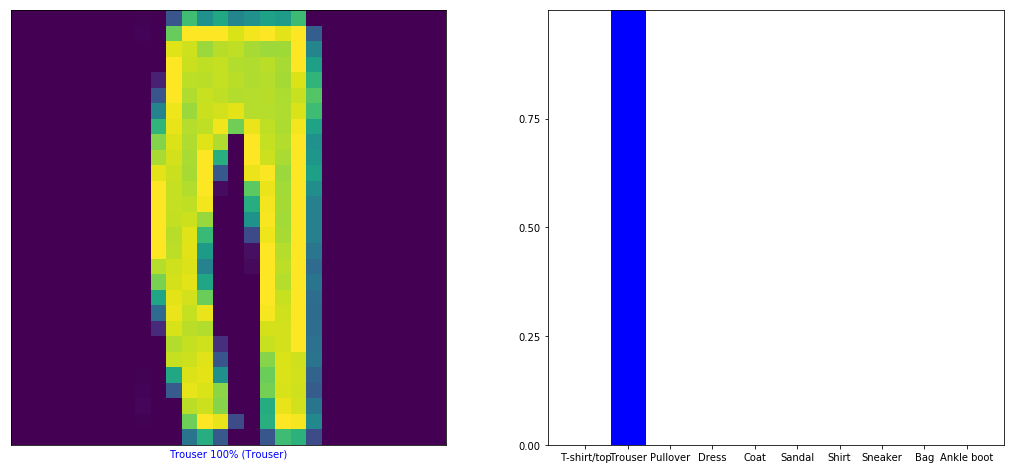

In [0]:
i = 2
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

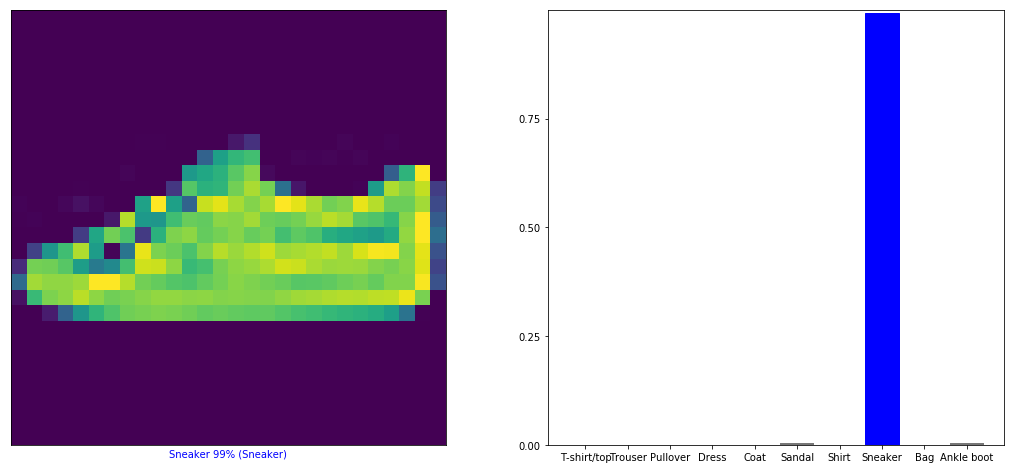

In [0]:
i = 3009
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

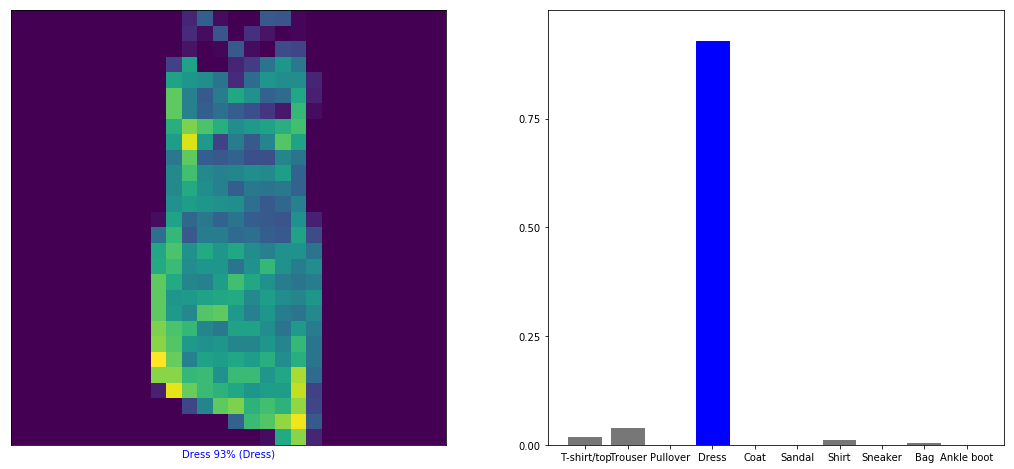

In [0]:
i = 1220
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

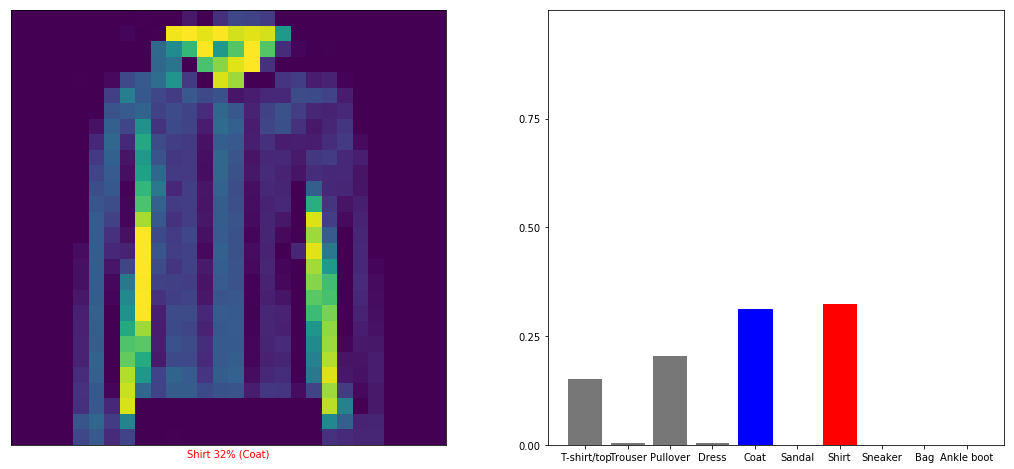

In [0]:
i = 6
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

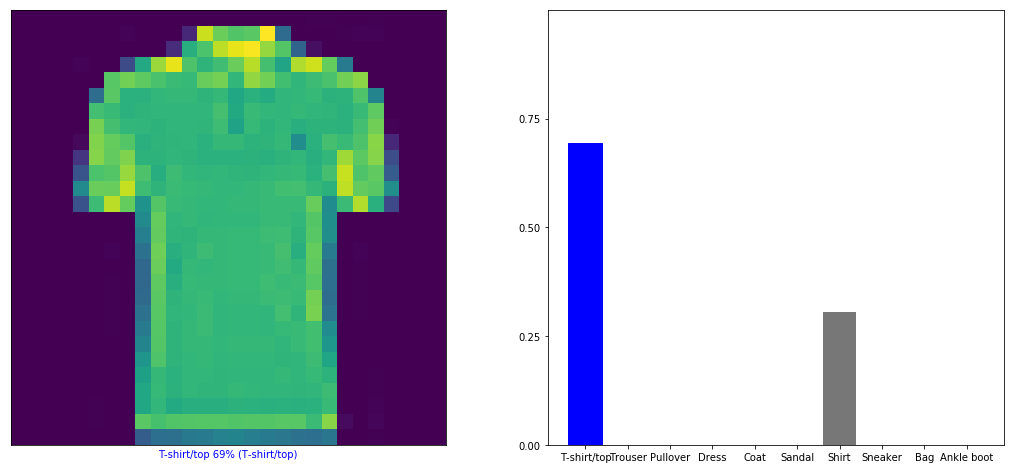

In [0]:
i = 4761
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

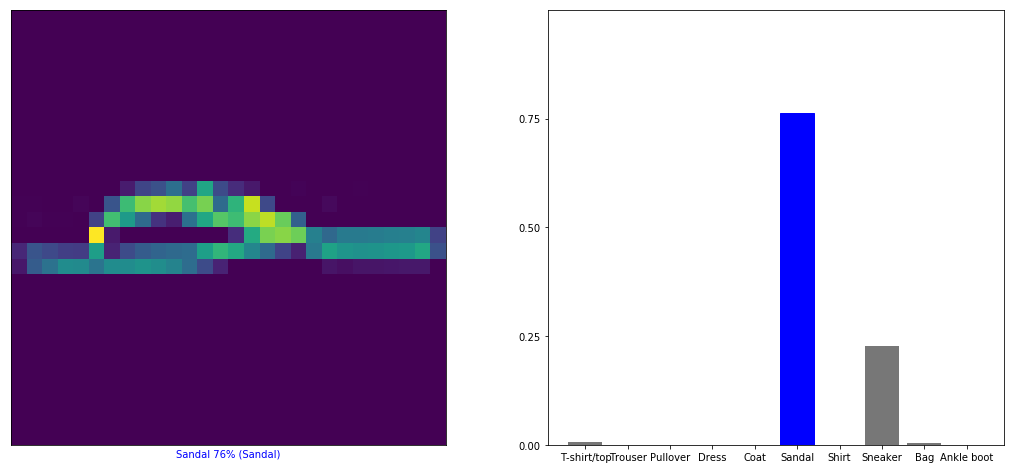

In [0]:
i = 8
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

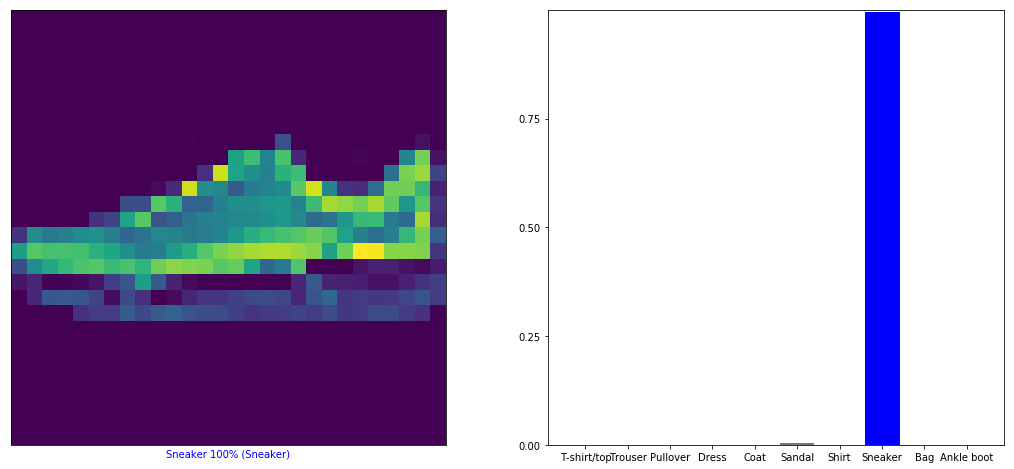

In [0]:
i = 9
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

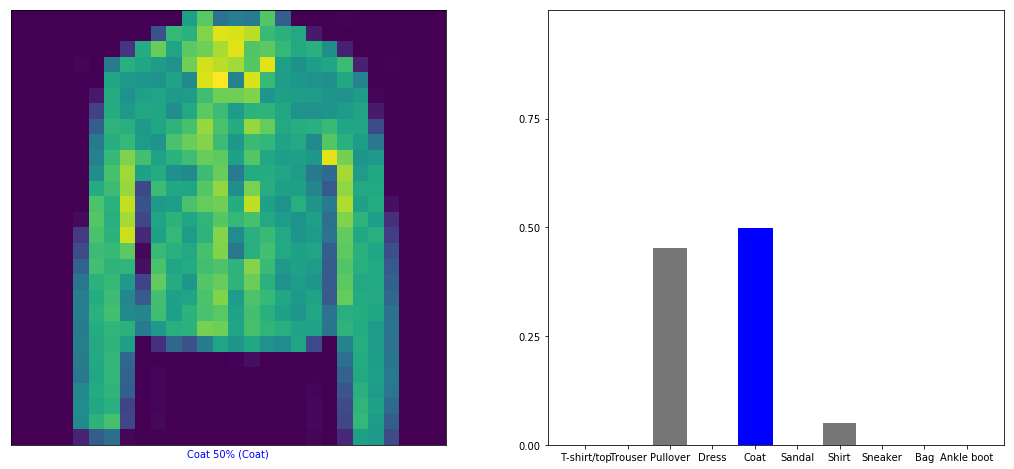

In [0]:
i = 10
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

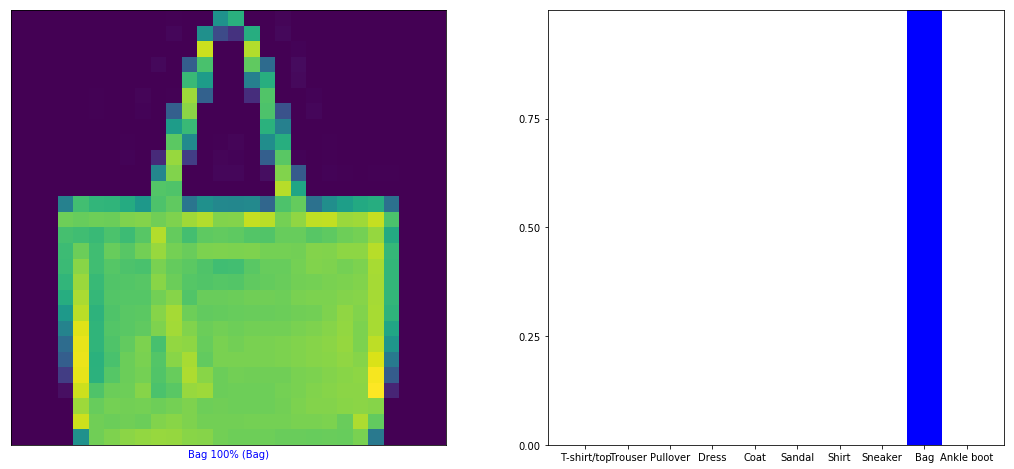

In [0]:
i = 900
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(proba, test_labels[i])
plt.show()

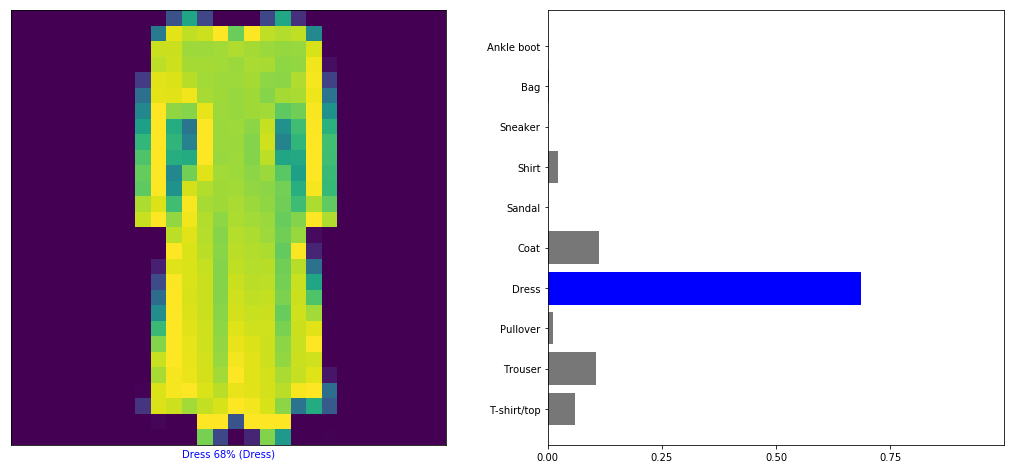

In [0]:
#function to show thw probability in each image in class
def ploth_value_array(proba, true_label):
  plt.grid(False)
  plt.yticks(range(10),image_name)
  plt.xticks(np.arange(0.0, 1.0, 0.25))
  thisplot = plt.barh(range(10),proba[0], color="#777777", align='center')
  plt.xlim([0, 1])
  predicted_label = np.argmax(proba)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 931
img = test_images[i].shape
proba = model.predict_proba(test_images[i].reshape(1, img[0]*img[1]))
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plot_image(proba, test_labels[i], test_images[i])
plt.subplot(1,2,2)
ploth_value_array(proba, test_labels[i])
plt.show()